# Timezone

- timezone이 하나가 아니라 여러가지라면 반드시 필요한 스킬
- 가령 한국 과 미국의 섞인 timezone의 데이터를 다루게 된다면 필수

In [2]:
from datetime import datetime, timezone

In [4]:
timezone.utc

datetime.timezone.utc

In [6]:
datetime(2019,1,1) # timezone unawared datetime - 지정되지 않은 timezone

datetime.datetime(2019, 1, 1, 0, 0)

In [9]:
datetime(2019,1,1, tzinfo=timezone.utc) # timezone awared datetime - 지정된 timezonebb

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [11]:
# 더 다양한 timzone을 사용하기 위해 패키지 설치 -> pytz

In [10]:
conda install pytz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bob8d\anaconda3

  added / updated specs:
    - pytz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1l             |       h2bbff1b_0         4.8 MB
    pytz-2021.1                |     pyhd3eb1b0_0         181 KB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following packages will be UPDATED:

  openssl                                 1.1.1k-h2bbff1b_0 --> 1.1.1l-h2bbff1b_0
  pytz                                          2020.1-py_0 --> 2021.1-pyhd3eb1b0_0




pytz-2021.1          | 181 KB    |            |   0% 
pytz-2021.1          | 181 KB    | ########## | 100% 
pytz-2021.1          | 181 KB    | ########## | 100% 

openssl-1.1.1l       | 4.8 MB    |            |   0% 
openssl-1.1.1l    

In [14]:
# 사용가능한 모든 timezone
import pytz
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [17]:
pytz.timezone('Asia/Seoul')

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [18]:
# timezone 비교
datetime(2019,1,1, tzinfo=timezone.utc) == pytz.UTC.localize(datetime(2019,1,1))

True

In [22]:
KST = pytz.timezone('Asia/Seoul')
KST.localize(datetime(2019,1,1))

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [19]:
# datetime 수정 시 timezone은 오류가 생김
datetime(2019,1,1).replace(year=2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [24]:
mydate = datetime(2019,1,1)
mydate.replace(tzinfo=KST) # replace로 timezone을 바꾸면 오류! -> +9:00:00 이 맞음

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [25]:
mydate_kst = KST.localize(mydate) # 이런식으로 새로 정의해서 넣어줘야함!
mydate_kst 

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [27]:
# 현재의 시간을 원하는 timezone에 해당하는 시간으로 바꾸기 
mydate_kst.astimezone(pytz.utc)

datetime.datetime(2018, 12, 31, 15, 0, tzinfo=<UTC>)

In [29]:
mydate_kst.astimezone(pytz.utc) == mydate_kst # timezone을 생각하면 동일한 시간임

True

In [30]:
#내가 원하는 형식으로 데이터 저장하기 -> # strftime.org
mydate_kst.strftime("%Y-%M-%d %H:%M:%S%Z")

'2019-00-01 00:00:00KST'

In [31]:
#Timezone 변경
mydate_kst.astimezone(pytz.utc).strftime("%Y-%M-%d %H:%M:%S%Z")

'2018-00-31 15:00:00UTC'

In [46]:
datetime.today()
# or
datetime.utcnow().astimezone(KST)

datetime.datetime(2021, 9, 26, 13, 1, 13, 917987, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [50]:
datetime.today().weekday() #0,1,2,3,4,5,6

6

In [63]:
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday()%4
    aweekago = today.replace(day = today.day-7)
    last_friday = aweekago.replace(day=aweekago.day+offset)
    return last_friday

last_friday()
# 이 코드는 년도를 넘어가거나 달의 일수가 다르다면 오류가 생김

datetime.datetime(2021, 9, 21, 22, 13, 36, 603532, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [65]:
# 해결방법 _ 상대적인 날짜에 적용
from datetime import timedelta
print(pytz.utc.localize(mydate) - KST.localize(mydate))
print(pytz.utc.localize(mydate) - timedelta(seconds=23400)) #년, 월 을 넘어가도 계산가능

9:00:00
2018-12-31 17:30:00+00:00


In [66]:
# 수정버전
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday()%4
#     aweekago = today.replace(day = today.day-7)
    aweekago = today - timedelta(weeks=1)
#     last_friday = aweekago.replace(day=aweekago.day+offset)
    last_friday = aweekago + timedelta(days=offset)
    return last_friday

last_friday()

datetime.datetime(2021, 9, 21, 22, 20, 33, 440013, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

내가 받은 데이터가 예를 들면 KST->UTC로 변환을 해야된다 하면 굳이 인덱스를 다 접근해서 변경할 필요없이 timedelta를 통해서 계산 가능

# Visualization

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df_apple = pd.read_csv('data/apple_stock.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

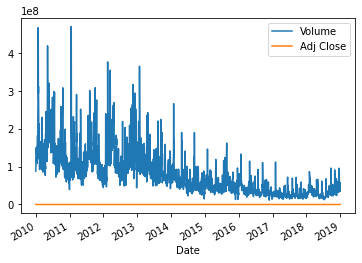

In [69]:
df_apple[['Volume','Adj Close']].plot() # 이렇게 하면 2개의 그래프를 한눈에 파악하기 힘듦

Text(0.5, 1.0, 'Apple')

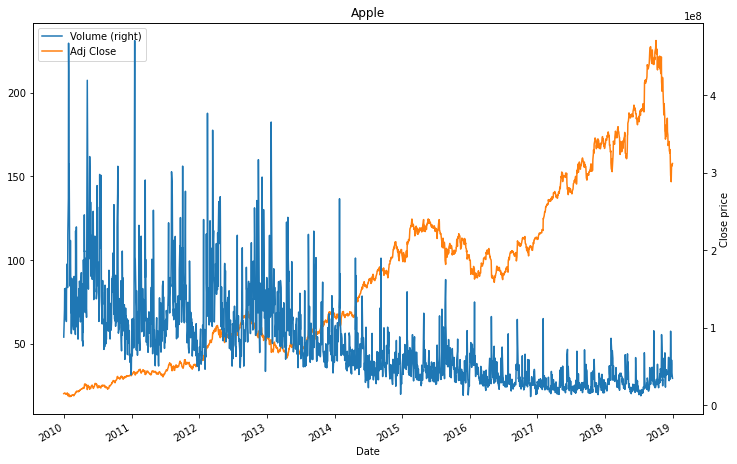

In [74]:
##두개의 그래프 파악 가능, 단위를 다르게 두어
df_apple[['Volume','Adj Close']].plot(secondary_y=['Volume'],figsize=(12,8)) 
plt.ylabel('Close price')
plt.xlabel('Overwrite Date')
plt.title('Apple')

<AxesSubplot:xlabel='Date'>

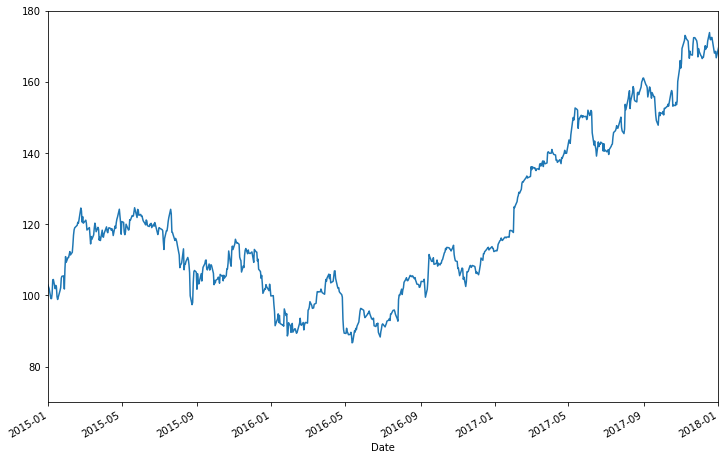

In [81]:
# df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot(figsize = (12,8))
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'], ylim=[70,180],figsize = (12,8))

In [83]:
index = df_apple['Adj Close']['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

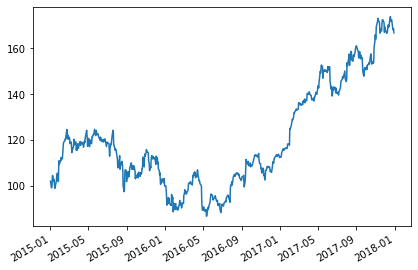

In [89]:
# 글자들이 겹칠 때 사용하는
fig, ax = plt.subplots()
ax.plot_date(index, stock, '-')
plt.tight_layout() #써주는거 추천
fig.autofmt_xdate() # 알아서 해결해줌

In [90]:
import matplotlib.dates as dates

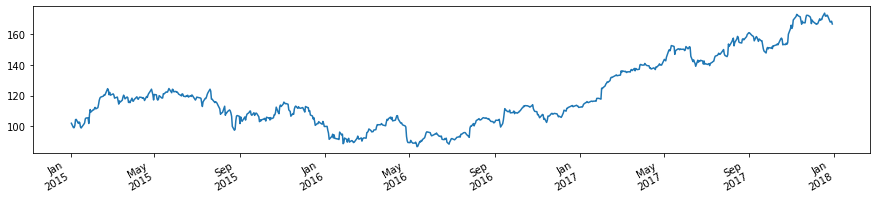

In [100]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot_date(index, stock, '-')
fig.autofmt_xdate() # 알아서 해결해줌
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))